In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
nz = 100

image_size = 28

ngpu = 1

# Decide which device we want to run on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
# Generator
# input = random vector, output = fake image
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Linear(in_features=nz, out_features=256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256, momentum=0.8),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512, momentum=0.8),
            
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(1024, momentum=0.8),
            
            nn.Linear(1024, image_size*image_size),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

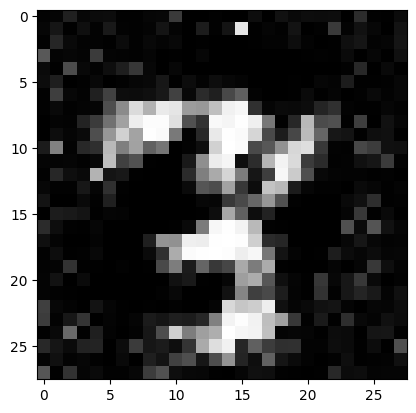

In [11]:
# Load model
generator = Generator(ngpu).to(device)
generator.load_state_dict(torch.load("./mnist-normal-gan-model.pt", weights_only=True))

# Set the generator to evaluation mode
generator.eval()

# Generate a sample noise vector
sample_noise = torch.randn(1, nz, device=device)

# Generate an image from the noise vector
X = generator(sample_noise).detach().cpu()

# Plot the generated image
plt.imshow(X.view(image_size, image_size), cmap='gray')
plt.show()

tensor([ 1.0000, -1.0000, -0.6192, -2.1372,  0.0661, -0.3393, -0.9404,  2.4421,
         1.2392, -1.3509, -0.7523,  1.8089, -0.2451, -0.9583, -0.9763,  0.1000,
         1.0437, -1.5219, -0.2642,  0.0953, -0.6465, -0.0077, -0.1353, -1.4832,
        -0.1980,  0.8478,  1.0360, -0.0663,  0.7624,  1.1277,  0.3103, -0.0168,
         0.3332,  0.5841, -1.2182, -1.2184, -0.4540, -0.6738,  1.1563,  0.9180,
         0.6882,  0.3580, -0.6664,  0.2689,  0.1229, -0.4273,  0.4257,  0.9997,
         0.9083,  1.6725,  1.8976, -0.3954,  1.3261, -1.6733, -1.7643, -0.2413,
        -3.0677,  0.6081,  0.4292,  1.5116,  0.7797,  0.2786,  0.2240, -0.2714,
         0.5050,  0.6226, -1.1375,  1.7016,  0.2736,  0.9346, -0.6863, -0.3309,
        -2.0959,  0.5454, -0.7516,  0.2207, -2.1877,  0.0618,  2.1052, -1.3549,
         1.6080, -0.2495,  1.5254,  0.5778, -0.4276, -0.9950,  0.3271, -1.8933,
         0.1219,  0.9776, -0.4142,  1.1185, -1.2449, -0.4130,  1.7750,  0.4536,
         0.9228, -1.0293,  1.5384, -0.42

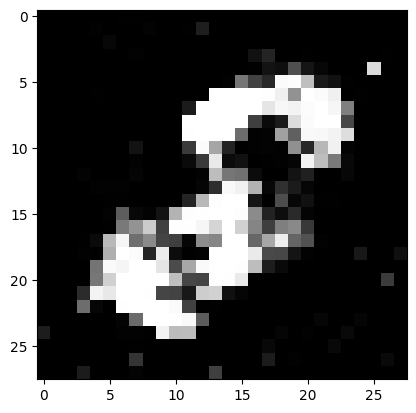

In [41]:
# Generate a sample noise vector
sample_noise[0][0] = 1
sample_noise[0][1] = -1

# Generate an image from the noise vector
X = generator(sample_noise).detach().cpu()

# Plot the generated image
plt.imshow(X.view(image_size, image_size), cmap='gray')
plt.show()